In [1]:
import tensorflow as tf

In [2]:
embeddingDim=10
timesteps = 400
n_features = 13

In [4]:
model_tf = tf.keras.models.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=embeddingDim,input_shape=(timesteps,n_features),return_sequences=False)),
    tf.keras.layers.RepeatVector(timesteps),
    tf.keras.layers.LSTM(embeddingDim,activation='relu',return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))
    ])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [16]:
model_tf.compile(optimizer='adam',
              loss=tf.losses.mean_squared_error,
              metrics=['accuracy'])

In [17]:
model_tf.fit(input,input,epochs=10)

Epoch 1/10
20/20 [==============================] - 3s 173ms/sample - loss: 0.0035 - acc: 0.0056
Epoch 2/10
20/20 [==============================] - 1s 41ms/sample - loss: 0.0033 - acc: 0.0058
Epoch 3/10
20/20 [==============================] - 1s 45ms/sample - loss: 0.0031 - acc: 0.0050
Epoch 4/10
20/20 [==============================] - 1s 42ms/sample - loss: 0.0030 - acc: 0.0050
Epoch 5/10
20/20 [==============================] - 1s 49ms/sample - loss: 0.0029 - acc: 0.0050
Epoch 6/10
20/20 [==============================] - 1s 46ms/sample - loss: 0.0028 - acc: 0.0044
Epoch 7/10
20/20 [==============================] - 1s 43ms/sample - loss: 0.0028 - acc: 0.0047
Epoch 8/10
20/20 [==============================] - 1s 41ms/sample - loss: 0.0027 - acc: 0.0055
Epoch 9/10
20/20 [==============================] - 1s 41ms/sample - loss: 0.0027 - acc: 0.0055
Epoch 10/10
20/20 [==============================] - 1s 38ms/sample - loss: 0.0027 - acc: 0.0061


In [19]:
model_tf.history.history

{'loss': [0.0035137005615979433,
  0.0033089679200202227,
  0.003140519605949521,
  0.0030059069395065308,
  0.0029015936888754368,
  0.0028224862180650234,
  0.002762655960395932,
  0.0027173373382538557,
  0.002683668863028288,
  0.0026584859006106853],
 'acc': [0.005625,
  0.00575,
  0.005,
  0.005,
  0.005,
  0.004375,
  0.00475,
  0.0055,
  0.0055,
  0.006125]}

In [20]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [21]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 1s 0us/step


In [22]:
x_train.shape

(60000, 28, 28)

In [23]:
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [26]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)

In [27]:
x_test.shuffle()

<DatasetV1Adapter shapes: ((?, 28, 28, 1), (?,)), types: (tf.float64, tf.uint8)>

In [10]:
mfcc = torch.load('Mfcc_feature.pt')

In [12]:

input=[]
for m in mfcc['mfcc']:
    norm=normalize(m,axis=1)
    input.append(norm)

In [13]:
input=np.asarray(input).transpose(0,2,1)

In [14]:
input.shape

(20, 400, 13)

In [72]:
timesteps = 400
n_features = 13

In [111]:
model = Sequential()
model.add(Bidirectional(LSTM(units=10, return_sequences=False)))
model.add(RepeatVector(timesteps))
model.add(SeqSelfAttention(attention_activation='sigmoid'))
model.add(TimeDistributed(Dense(n_features)))
model.compile(optimizer='adam', loss='mse')

In [112]:

hist=model.fit(input ,input, epochs=10, verbose=1)

Epoch 1/10
20/20 [==============================] - 4s 178ms/step - loss: 0.0093
Epoch 2/10
20/20 [==============================] - 2s 110ms/step - loss: 0.0089
Epoch 3/10
20/20 [==============================] - 2s 99ms/step - loss: 0.0085
Epoch 4/10
20/20 [==============================] - 2s 94ms/step - loss: 0.0081
Epoch 5/10
20/20 [==============================] - 2s 97ms/step - loss: 0.0078
Epoch 6/10
20/20 [==============================] - 2s 95ms/step - loss: 0.0075
Epoch 7/10
20/20 [==============================] - 2s 94ms/step - loss: 0.0072
Epoch 8/10
20/20 [==============================] - 2s 94ms/step - loss: 0.0069
Epoch 9/10
20/20 [==============================] - 2s 95ms/step - loss: 0.0067
Epoch 10/10
20/20 [==============================] - 2s 97ms/step - loss: 0.0065


In [113]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_26 (Bidirectio (None, 20)                1920      
_________________________________________________________________
repeat_vector_17 (RepeatVect (None, 400, 20)           0         
_________________________________________________________________
seq_self_attention_26 (SeqSe (None, 400, 20)           1345      
_________________________________________________________________
time_distributed_17 (TimeDis (None, 400, 13)           273       
Total params: 3,538
Trainable params: 3,538
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.save(filepath='./model')

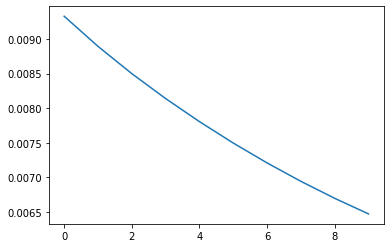

In [114]:
plt.plot(hist.history['loss'])

# Learning the Embedding

### just the encoder

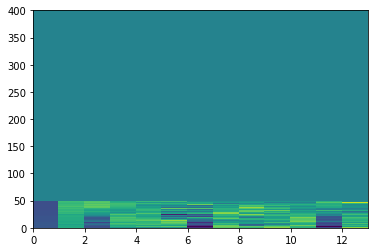

In [115]:
plt.pcolormesh(input[0])

In [116]:
out=model.predict(input[0][np.newaxis, :])

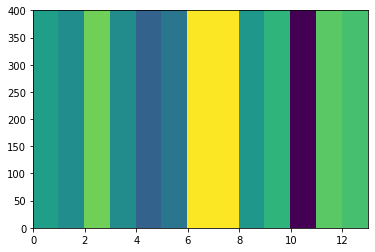

In [117]:
plt.pcolormesh(np.squeeze(out, axis=0))

In [118]:
from keras.models import Model
from keras.utils import plot_model
modelEnc = Model(inputs=model.inputs, outputs=model.layers[0].output)
modelEnc.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_27_input (InputLa (None, 400, 13)           0         
_________________________________________________________________
bidirectional_26 (Bidirectio (None, 20)                1920      
Total params: 1,920
Trainable params: 1,920
Non-trainable params: 0
_________________________________________________________________


In [119]:
Embedding=modelEnc.predict(input[0][np.newaxis, :])

In [120]:
print('Embedding')
print(Embedding)

Embedding
[[-0.00686083 -0.00864326 -0.00822356 -0.02047214  0.01130466  0.01389236
  -0.0057759  -0.00904584 -0.01280743 -0.00192563  0.12977761  0.06029322
   0.04037197  0.12240122  0.05628958 -0.07087634  0.15462956 -0.13739038
  -0.00565956 -0.03016908]]


In [156]:
import re


def tokenize(text):
    # obtains tokens with a least 1 alphabet
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

def mapping(tokens):
    word_to_id = dict()
    id_to_word = dict()

    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token

    return word_to_id, id_to_word

def generate_training_data(tokens, window_size,mfcc):
    N = len(tokens)
    X, Y = [], []

    for i in range(N):
        nbr_inds = list(range(max(0, i - window_size), i)) + \
                   list(range(i + 1, min(N, i + window_size + 1)))
        for j in nbr_inds:
            X.append(mfcc[i])
            Y.append(mfcc[j])
            
    X = np.array(X)
    # X = np.expand_dims(X, axis=0)
    Y = np.array(Y)
    # Y = np.expand_dims(Y, axis=0)

    return X, Y






In [121]:
doc = "After the deduction of the costs of investing, " \
      "beating the stock market is a loser's game."

In [122]:
doc

"After the deduction of the costs of investing, beating the stock market is a loser's game."

In [132]:
mfcc = torch.load('Mfcc_feature.pt')

In [177]:
X, Y = generate_training_data(mfcc['texts'], 3,mfcc['mfcc'])

In [178]:
X=np.asarray(X).transpose(0,2,1)
Y=np.asarray(Y).transpose(0,2,1)

In [179]:
Y.shape

(108, 400, 13)

In [180]:
X.shape

(108, 400, 13)

In [181]:
hist=model.fit(X ,Y, epochs=10, verbose=1)

Epoch 1/10
108/108 [==============================] - 13s 117ms/step - loss: 1264.6398
Epoch 2/10
108/108 [==============================] - 11s 98ms/step - loss: 1264.5264
Epoch 3/10
108/108 [==============================] - 10s 96ms/step - loss: 1264.3762
Epoch 4/10
108/108 [==============================] - 11s 103ms/step - loss: 1264.2077
Epoch 5/10
108/108 [==============================] - 13s 119ms/step - loss: 1263.9909
Epoch 6/10
108/108 [==============================] - 13s 119ms/step - loss: 1263.7110
Epoch 7/10
108/108 [==============================] - 12s 115ms/step - loss: 1263.3442
Epoch 8/10
108/108 [==============================] - 12s 108ms/step - loss: 1262.7623
Epoch 9/10
108/108 [==============================] - 12s 111ms/step - loss: 1261.7562
Epoch 10/10
108/108 [==============================] - 12s 107ms/step - loss: 1260.1427


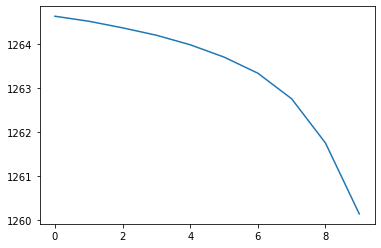

In [182]:
plt.plot(hist.history['loss'])

In [198]:
Embedding1=modelEnc.predict(input[0][np.newaxis, :])[0]
Embedding2=modelEnc.predict(input[0][np.newaxis, :])[0]
Embedding3=modelEnc.predict(input[0][np.newaxis, :])[0]
Embedding4=modelEnc.predict(input[0][np.newaxis, :])[0]

In [199]:
Embeddings=[Embedding1,Embedding2,Embedding3,Embedding4]
Labels=['label1','label2','label3','label4']

In [200]:
Embedding1[0]

-0.25670868

In [201]:
Embeddings=np.asarray(Embeddings)

In [202]:
Embeddings

array([[-0.25670868, -0.22549383, -0.30603367, -0.15559319,  0.27383944,
         0.31383502,  0.30497184, -0.27454165, -0.42191547, -0.4040235 ,
         0.3842755 ,  0.21999857, -0.05123662, -0.14014848, -0.14884262,
         0.05286856, -0.12570556, -0.40371042, -0.3599852 ,  0.30710623],
       [-0.25670868, -0.22549383, -0.30603367, -0.15559319,  0.27383944,
         0.31383502,  0.30497184, -0.27454165, -0.42191547, -0.4040235 ,
         0.3842755 ,  0.21999857, -0.05123662, -0.14014848, -0.14884262,
         0.05286856, -0.12570556, -0.40371042, -0.3599852 ,  0.30710623],
       [-0.25670868, -0.22549383, -0.30603367, -0.15559319,  0.27383944,
         0.31383502,  0.30497184, -0.27454165, -0.42191547, -0.4040235 ,
         0.3842755 ,  0.21999857, -0.05123662, -0.14014848, -0.14884262,
         0.05286856, -0.12570556, -0.40371042, -0.3599852 ,  0.30710623],
       [-0.25670868, -0.22549383, -0.30603367, -0.15559319,  0.27383944,
         0.31383502,  0.30497184, -0.27454165, -

In [234]:
def embeddingPlotTSNE(X,words):
    import numpy as np
    from sklearn.manifold import TSNE
    X_embedded = TSNE(n_components=2).fit_transform(X)
    X_embedded.shape
    for word in range(len(words)):
        x, y = X_embedded[word][0],X_embedded[word][1]
        plt.scatter(x, y, marker='.', color='red')
        plt.text(x+10, y+1, words[word], fontsize=9)
        plt.title('t-SNE projection of the word embeddings')
    plt.show()


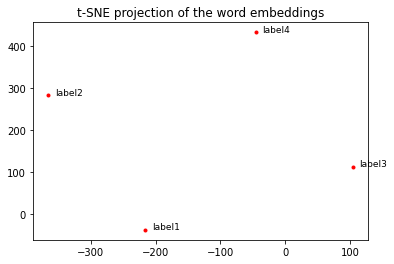

In [235]:
embeddingPlotTSNE(Embeddings,words)

In [221]:
words=Labels

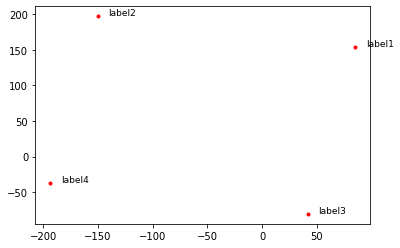